In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
carmod = pd.read_csv('Car_Model.csv')

In [3]:
carmod.shape

(398, 9)

In [4]:
#carmod.info()

In [5]:
carmod.dtypes


mpg             float64
Cylinders         int64
displacement    float64
Horsepower       object
Weight            int64
accelaration    float64
ModelYear         int64
Version           int64
Carname          object
dtype: object

In [6]:
#carmod.describe(include='all')

In [7]:
carmod.columns

Index(['mpg', 'Cylinders', 'displacement', 'Horsepower', 'Weight',
       'accelaration', 'ModelYear', 'Version', 'Carname'],
      dtype='object')

In [8]:
#sns.pairplot(carmod)

In [9]:
#sns.distplot(carmod['Weight'])

In [10]:
corr=carmod.corr()
corr

,mpg,Cylinders,displacement,Weight,accelaration,ModelYear,Version
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
Weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
accelaration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
ModelYear,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
Version,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


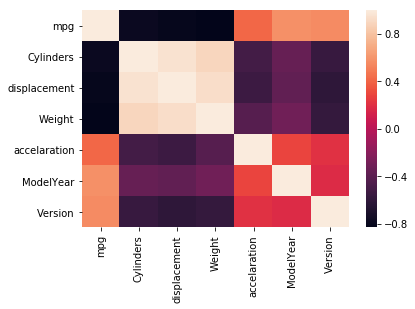

In [11]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [12]:
x = carmod[['Weight','displacement','Cylinders','ModelYear','Version','accelaration']]
y = carmod['mpg']

In [13]:
#x

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train)

In [17]:
#x_train
#x_test

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
poly_test = poly.transform(x_test)

In [20]:
print(lm.intercept_)

30166057334419.984


In [21]:
#pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

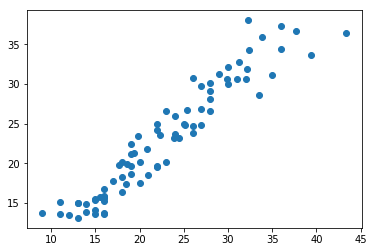

array([36.48828125, 31.1015625 , 18.48828125, 20.22265625, 29.796875  ,
       21.21875   , 18.22265625, 23.17578125, 15.015625  , 26.671875  ,
       20.15234375, 30.59765625, 19.51171875, 29.125     , 23.8359375 ,
       17.484375  , 17.40625   , 26.87109375, 24.69921875, 19.72265625,
       30.625     , 24.82421875, 31.90234375, 23.40234375, 17.734375  ,
       13.77734375, 24.20703125, 13.84375   , 28.5703125 , 14.82421875,
       38.01953125, 24.8046875 , 20.171875  , 24.96875   , 25.96875   ,
       21.2578125 , 15.58203125, 30.16796875, 15.75390625, 14.94140625,
       13.75      , 13.1328125 , 15.2734375 , 33.6796875 , 15.69921875,
       22.38671875, 13.5703125 , 15.34765625, 19.8046875 , 34.32421875,
       26.65625   , 23.7421875 , 37.34765625, 18.6640625 , 19.9375    ,
       15.44921875, 23.51953125, 26.59765625, 13.55859375, 34.3984375 ,
       30.61328125, 21.74609375, 24.9765625 , 16.7265625 , 35.89453125,
       16.34765625, 23.23046875, 15.8984375 , 30.8125    , 13.62

In [22]:
predictions = lm.predict(poly_test)
plt.scatter(y_test,predictions)
plt.show()
predictions

In [23]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test,predictions))
print('MSE :', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 1.765869140625
MSE : 5.2675580978393555
RMSE: 2.2951161403814306


In [24]:
r2_test=lm.score(poly_test,y_test)
r2_test

0.9058473117118601

In [25]:
#other way of finding r-square
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9058473117118601

In [26]:
adjr2_test = 1-((1-r2_test)*(len(poly_test)-1)/(len(poly_test)-x_test.shape[1]-1))
adjr2_test

0.8981087345922869

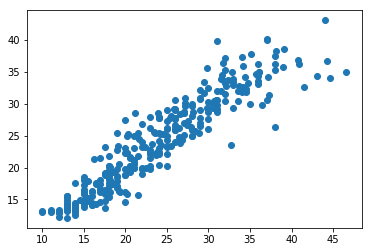

array([24.12890625, 27.7265625 , 17.34375   , 13.61328125, 14.97265625,
       31.90234375, 13.015625  , 37.1875    , 34.35546875, 30.52734375,
       23.59375   , 32.515625  , 35.28515625, 32.62890625, 33.609375  ,
       13.05078125, 14.1171875 , 14.19140625, 34.3203125 , 18.90234375,
       25.78515625, 21.44921875, 15.51953125, 20.1875    , 27.80078125,
       30.59375   , 19.875     , 30.06640625, 19.82421875, 28.6875    ,
       26.9140625 , 14.59375   , 24.02734375, 25.3984375 , 14.08203125,
       24.9296875 , 33.4296875 , 32.16015625, 19.59375   , 24.80078125,
       17.12109375, 32.0546875 , 33.80859375, 29.1640625 , 19.69921875,
       26.1171875 , 29.1640625 , 27.7421875 , 13.7890625 , 20.27734375,
       35.0234375 , 37.76171875, 22.1796875 , 13.01953125, 33.83203125,
       16.60546875, 15.515625  , 13.72265625, 32.6484375 , 30.28125   ,
       15.9921875 , 14.8828125 , 36.28515625, 35.05078125, 22.07421875,
       14.125     , 34.921875  , 23.37109375, 37.4921875 , 27.95

In [27]:
predictions_train = lm.predict(poly_train)
plt.scatter(y_train,predictions_train)
plt.show()
predictions_train

In [28]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_train,predictions_train))
print('MSE :', metrics.mean_squared_error(y_train,predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))

MAE : 2.0626326650943394
MSE : 7.940414014132517
RMSE: 2.8178740238223066


In [29]:
r2_train = lm.score(poly_train,y_train)
r2_train

0.8719963579440329

In [30]:
adjr2_train=1-((1-r2_train)*(len(poly_train)-1)/(len(poly_train)-poly_train.shape[1]-1))
adjr2_train

0.859594620997434

In [31]:
x_train

array([[-0.54256605, -0.6871441 , -0.83939625, -0.54191927,  1.80673202,
        -0.16633395],
       [-0.932293  , -0.72564076, -0.83939625, -0.8111854 ,  0.53843007,
         0.01886982],
       [ 1.18353578,  1.53603771,  1.50722359,  0.80441141, -0.72987188,
        -0.83306753],
       ...,
       [-0.17638756, -0.34067421, -0.83939625,  1.07367755, -0.72987188,
        -0.38857848],
       [ 0.34756559,  0.38113807,  0.33391367,  0.80441141, -0.72987188,
        -0.01817094],
       [ 1.73692449,  2.53695073,  1.50722359, -1.61898381, -0.72987188,
        -2.01837167]])